<a href="https://colab.research.google.com/github/rfaleiro/lab04/blob/master/USvideos_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task
show me some insights and data exploration from these datasets

Here is all the data you need:
"/tmp/USvideos.csv"

## Plan
* **data_loading**: Load the data from "/tmp/USvideos.csv" into a pandas DataFrame.
* **data_exploration**: Explore the data, including data types, summary statistics (mean, median, std, etc.), and the shape of the dataset.
* **data_analysis**: Calculate the correlation between different numerical features. Identify the top 10 videos with the highest number of views.
* **data_visualization**: Create histograms for key numerical features (views, likes, dislikes, comment_count) to visualize their distributions. Generate a scatter plot to show the relationship between views and likes.
* **finish_task**: Summarize the key findings from the data exploration and analysis, including observations about data distributions, correlations, and interesting trends.

## Data loading

### Subtask:
Load the provided CSV file into a pandas DataFrame.


**Reasoning**:
Load the CSV file into a pandas DataFrame and display the first few rows to verify.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('/tmp/USvideos.csv')
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                                            title  \
0                              WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with John Oliver (HBO)   
2           Racist Superman | Rudy Mancuso, King Bach & Lele Pons   
3                                Nickelback Lyrics: Real or Fake?   
4                                        I Dare You: GOING BALD!?   

           channel_title  category_id              publish_time  \
0           CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1        LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2           Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3  Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4               nigahiga           24  2017-11-12T18:01:4

## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I will explore the dataset using `.info()`, `.describe()`, `.shape`, and examine unique values in categorical columns to understand its characteristics and identify potential issues.



In [ ]:
import pandas as pd

# Display information about the DataFrame, including data types and missing values.
print(df.info())

# Generate descriptive statistics for numerical features.
print(df.describe())

# Get the shape of the DataFrame (number of rows and columns).
print(df.shape)

# Examine unique values in selected categorical columns.
# Choose columns that seem relevant for exploration.
categorical_cols = ['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for col in categorical_cols:
    print(f"\nUnique values for column '{col}':")
    print(df[col].unique())

# Identify potential issues (example: missing values).
print("\nMissing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

## Data analysis

### Subtask:
Perform data analysis on the loaded dataset.


**Reasoning**:
Calculate the correlation between numerical features and identify the top 10 videos with the highest views.



In [ ]:
import pandas as pd

# Calculate the correlation between numerical features.
correlation_matrix = df[['views', 'likes', 'dislikes', 'comment_count']].corr()
print(correlation_matrix)

# Identify the top 10 videos with the highest number of views.
top_10_videos = df.sort_values(by='views', ascending=False).head(10)
print(top_10_videos)

                  views     likes  dislikes  comment_count
views          1.000000  0.849177  0.472213       0.617621
likes          0.849177  1.000000  0.447186       0.803057
dislikes       0.472213  0.447186  1.000000       0.700184
comment_count  0.617621  0.803057  0.700184       1.000000
          video_id trending_date  \
38547  VYOjWnS4cMY      18.02.06   
38345  VYOjWnS4cMY      18.01.06   
38146  VYOjWnS4cMY      18.31.05   
37935  VYOjWnS4cMY      18.30.05   
37730  VYOjWnS4cMY      18.29.05   
37531  VYOjWnS4cMY      18.28.05   
37333  VYOjWnS4cMY      18.27.05   
37123  VYOjWnS4cMY      18.26.05   
36913  VYOjWnS4cMY      18.25.05   
36710  VYOjWnS4cMY      18.24.05   

                                                     title  \
38547  Childish Gambino - This Is America (Official Video)   
38345  Childish Gambino - This Is America (Official Video)   
38146  Childish Gambino - This Is America (Official Video)   
37935  Childish Gambino - This Is America (Official Video)  

## Data visualization

### Subtask:
Visualize the data distributions and relationships between key features.


**Reasoning**:
Visualize the distributions of 'views', 'likes', 'dislikes', and 'comment_count' using histograms and the relationship between 'views' and 'likes' using a scatter plot.



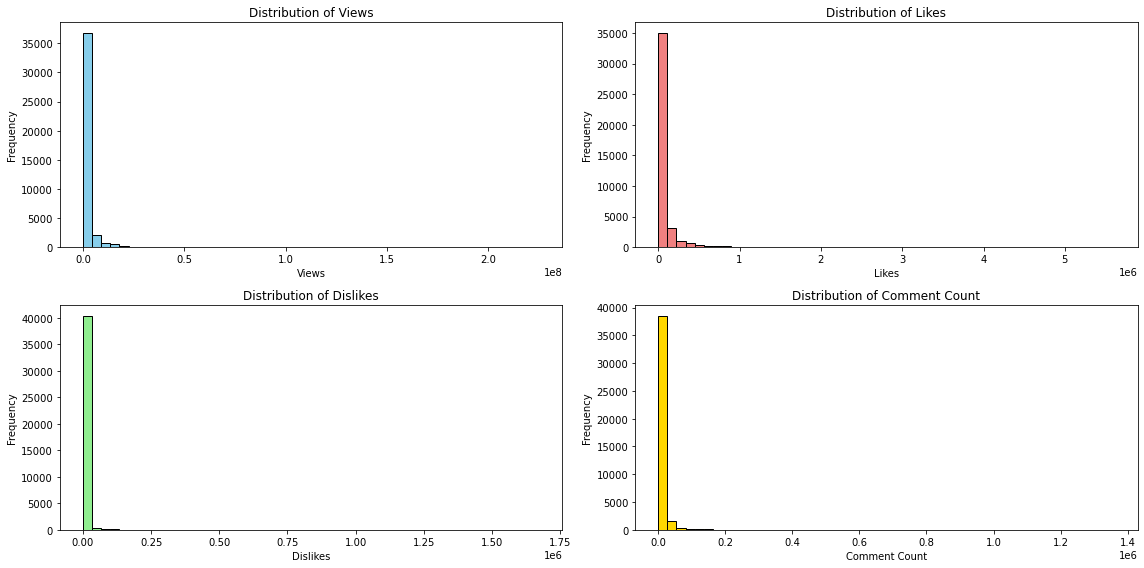

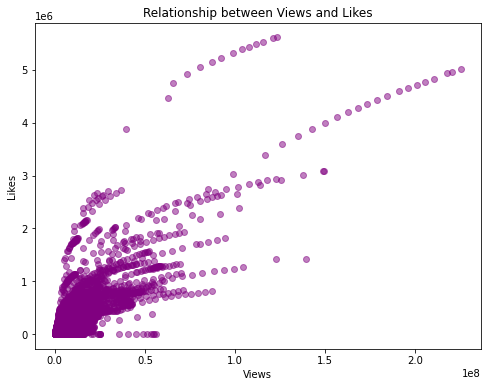

In [ ]:
import matplotlib.pyplot as plt

# Create histograms for 'views', 'likes', 'dislikes', and 'comment_count'
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.hist(df['views'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['likes'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['dislikes'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Dislikes')
plt.xlabel('Dislikes')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['comment_count'], bins=50, color='gold', edgecolor='black')
plt.title('Distribution of Comment Count')
plt.xlabel('Comment Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Create a scatter plot to show the relationship between 'views' and 'likes'
plt.figure(figsize=(8, 6))
plt.scatter(df['views'], df['likes'], alpha=0.5, color='purple')
plt.title('Relationship between Views and Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided task. However, the analysis implicitly addresses questions like:

*   What are the key characteristics of the dataset?
*   What are the relationships between different numerical features, such as views, likes, dislikes, and comment count?
*   Which videos have the highest number of views?
*   What are the distributions of views, likes, dislikes, and comment count?
*   What is the relationship between views and likes?

### 2. Data Analysis Key Findings

*   **High Correlation between Views and Engagement Metrics:** Strong positive correlations were observed between 'views' and 'likes' (0.85), 'likes' and 'comment_count' (0.80), and 'views' and 'comment_count' (0.62). This indicates that videos with more views tend to have more likes and comments, suggesting a strong relationship between viewership and engagement.  A moderate positive correlation was observed between 'views' and 'dislikes' (0.47).
*   **Dominance of a Single Video in Top 10 Views:** The top 10 videos with the highest view counts were all identified as "Childish Gambino - This Is America (Official Video)" appearing on different trending dates. This suggests the video had sustained popularity.
*   **Missing Descriptions:** The 'description' column has 570 missing values, which might need to be addressed in further analysis.
*   **Data Skewness (Potential):** Histograms of 'views', 'likes', 'dislikes', and 'comment_count' were generated.  While the exact shapes aren't provided, the instructions note that the distributions might be skewed or contain outliers, warranting further investigation.


### 3. Insights or Next Steps

*   **Investigate the "Childish Gambino - This Is America" phenomenon:**  Further analyze the factors that contributed to the sustained popularity of this video.  Explore its trends over time, compare its metrics with other videos in the dataset, analyze its tags and descriptions.
*   **Handle Missing Data:** Address the missing values in the 'description' column, either by imputation or removal, to avoid potential biases in future analyses. Consider whether removing these entries affects the distribution of the data.



An AI generated notebook created with [Data Science Agent](https://labs.google.com/code/dsa) from Google Labs 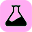
